In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset1 S4

In [2]:
""" Step 1: Load the data points and ground truth values (Some ground truth values may be in a different file) """
#======= 1. Dataset_1/S1.txt: N=5000 vectors and k=15 Gaussian cluster =======#

# s4 dataset
s4 = pd.read_csv(r'Part1_data\dataset_1\s4.txt', header = None, delim_whitespace=True)
s4.shape
s4.columns
s4.columns = ['X1', 'X2']

# s4 centroids
s4_cb = pd.read_csv(r'Part1_data\dataset_1\s-originals\s4-cb.txt', header = None, delim_whitespace=True)
s4_cb.shape
s4_cb.columns
s4_cb.columns = ['X1', 'X2']

#1 s4 labels
s4_l = pd.read_csv(r'Part1_data\dataset_1\s-originals\s4-label.pa')
s4_l.head()
# remove non-label content
s4_l = s4_l[4:]
s4_l.head()
s4_l.index = range(5000)

s4_l.shape
s4_l.columns
s4_l.info()
s4_l.describe()

# combine the X data and y_true label as a new dataframe
s4['Label'] = s4_l
s4.Label = s4.Label.astype(int)
s4.shape
s4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
VQ PARTITIONING 2.0    5000 non-null object
dtypes: object(1)
memory usage: 39.1+ KB


,X1,X2,Label
0,624474,837604,1
1,673412,735362,1
2,647442,677000,1
3,532283,741384,1
4,646529,742844,1


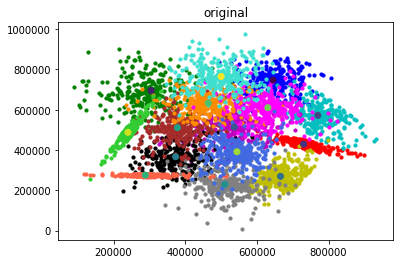

In [3]:
# supervised plot of all points using given label and centroids

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey','brown','tomato','darkorange','magenta','royalblue','limegreen','turquoise']
plt.figure()
for i in range(1, 16):
    #plt.scatter(X[:,0][y == i], X[:,1][y == i], s=30, cmap = i)
    plt.scatter(s4.X1[s4.Label == i], s4.X2[s4.Label == i], s=10, c=colors[i-1]) # color is repeated, use unique colors
plt.scatter(s4_cb.iloc[:,0], s4_cb.iloc[:,1], c = range(1, 16))
plt.title('original')
plt.show()

In [4]:
""" Step 3: Split data into train and test. """
from sklearn.model_selection import train_test_split

X = s4
y = s4.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### knn

In [5]:
""" Step 4 (2 pts): Use KNN (own NumPy code & sklearn library) to clusters the data."""
# function 1. Euclidean Distance function between two rows
def euclidean_distance(row1, row2): 
    """This function returns the Euclidean Distance between two rows"""
    
    # this converts to np.arrays nn case that data sets are not converted
    row1, row2 = np.array(row1), np.array(row2)
    
    distance = 0
    for i in range(len(row1)):     #-1
        # sum of squared differences
        distance += np.square(row1[i] - row2[i])
    # return the square root of the sum
    return np.sqrt(distance)

#test code for func 2
X_train[0, :-1]
X_test[0, :-1]
euclidean_distance(X_train[0, :-1], X_test[0, :-1])

# function 2. predicting the class of a test row using knn algorithm
def predict(k, train_set, test_instance): #here we are defining our model
    """This function returns the nearest neighbors
        train_set: training data set that includes labels
        test_instance: a row in the test set that also include its label
        k: number of neighborhoods
    """
    # this converts to np.arrays nn case that data sets are not converted
    train_set = np.array(train_set)
    test_instance = np.array(test_instance)
    
    l = len(train_set)

    # empty list to store distances of each row in train set vs a row in test set
    distances = []
    for i in range(l): # -1
        # find the distance between each row of train set and the test instance (a single row)
        dist = euclidean_distance(train_set[i, :-1], test_instance)
        # append the row from train set and its distance to the test instance
        distances.append((train_set[i], dist))
        
    # sort the distances list by dist
    distances.sort(key = lambda x: x[1])
    
    # empty list to store k nearest neighbors
    neighbors = []    
    for i in range(k):
        # append the rows from train set in distances to neighborhoods
        neighbors.append(distances[i][0])
        
    # determine the class of a test instance
    classes = {}
    for i in range(len(neighbors)):
        # 
        response = neighbors[i][-1]
        
        # 
        if response in classes:
            classes[response] += 1
        # 
        else:
            classes[response] = 1
            
    # sort the values in classes in descending order
    sorted_classes = sorted(classes.items(), key = lambda x: x[1], reverse = True)
    
    # return the one has the highest vote
    return(sorted_classes[0][0])


# function 3. evaluate the model and returns accuracy
def evaluate(y_true, y_pred):
    """returns % of correct prediction"""
    
    # number of correct predictions
    correct = 0
    
    # iterate over 2 arrays at the same time
    for actual, pred in zip(y_true, y_pred):
        # if
        if actual == pred:
            correct += 1
    
    # accuray
    return str(np.round(correct /len(y_true)*100 ,2)) + '%'
## end of functions of KNN ##

## clustering
# empty list to store predictions
k = 15
y_pred = []
for i in range(len(X_test)):
    predictor = X_test[i, :-1]
    prediction = predict(k, X_train, predictor)
    y_pred.append(prediction)

# true labels
actual = np.array(y_test)
# evaluation
evaluate(actual, y_pred)


# KNN using sci-kit learn
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

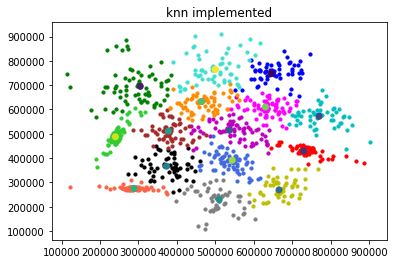

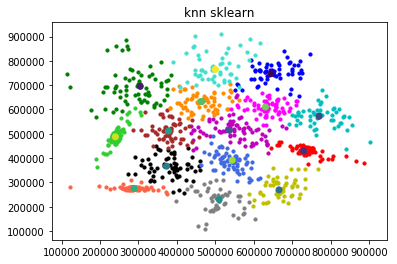

In [6]:
""" Step 5 (1 pts): Plot your result in different colors similar to Step 2. """

 # new arrays without labels
X_tr = X_train[:, :-1]
X_te = X_test[:, :-1]

# this is a plot of the test set
plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][np.array(y_pred) == i], X_te[:, 1][np.array(y_pred) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors

plt.scatter(s4_cb.iloc[:,0], s4_cb.iloc[:,1], c = range(1, 16))
plt.title('knn implemented')
plt.show()

plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][np.array(y_knn) == i], X_te[:, 1][np.array(y_knn) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors

plt.scatter(s4_cb.iloc[:,0], s4_cb.iloc[:,1], c = range(1, 16))
plt.title('knn sklearn')
plt.show()

In [7]:
""" Step 6 (1 pts): Print the confusion matrix to check model performance. """
from sklearn.metrics import confusion_matrix
# cm_own
cm_own = confusion_matrix(y_test, y_pred) # y_pred is from my implementation
print(cm_own)
print(np.sum(np.diag(cm_own))/len(X_test))
print('\n')
# cm_sklearn
cm_knn = confusion_matrix(y_test, y_knn) # y_knn is from sklearn 
print(cm_knn)
print(np.sum(np.diag(cm_knn))/len(X_test))

[[51  0  0  1  0  0  0  0  0  0  0  4  0  0  3]
 [ 0 58  0  0  1  0  0  0  3  0  2  0  0  4  2]
 [ 0  0 65  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1 48  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  1 48  0  1  0  3  0  4  7  7  0  1]
 [ 0  0  1  0  0 52  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 43  2  5  7  0  0  1  0  0]
 [ 0  0  0  0  0  3  4 45  0  0  0  0  5  0  0]
 [ 0  3  0  0  5  0  9  0 57  0  7  0  1  2  0]
 [ 0  0  0  0  0  0  1  1  0 65  0  0  0  0  0]
 [ 0  4  0  0  1  0  0  0  3  0 46  2  0  0  5]
 [ 4  0  0  5 10  0  0  0  0  0  7 50  0  0  2]
 [ 0  0  0  0  6  0  2  5  0  0  0  1 60  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0 77  0]
 [ 3  2  0  0  0  0  0  0  1  0  5  1  0  0 48]]
0.813


[[51  0  0  1  0  0  0  0  0  0  0  4  0  0  3]
 [ 0 58  0  0  1  0  0  0  3  0  3  0  0  4  1]
 [ 0  0 65  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1 48  0  0  0  0  0  0  0  7  0  0  0]
 [ 1  0  0  1 48  0  1  0  3  0  4  7  7  0  0]
 [ 0  0  1  0  0 52  0  1  0  0

### kmeans

In [8]:
"""Step 7 (4 pts): Repeat Steps 3 - 6 and use K-means (own NumPy code & sklearn library) to
perform the same. Additionally, print the centroids."""
from copy import deepcopy


######## same as step 3 but kmeans #########
K = 15 # Number of clusters
n = X_te.shape[0] # rows
c = X_te.shape[1] # cols except label

In [9]:
######## same as step 4 but kmeans #########
# random centroids
mean = np.mean(X_te, axis = 0)
mean
std = np.std(X_te, axis = 0)
std

centroids = np.random.randn(K,c)*std + mean
centroids

centroids_old = np.zeros(centroids.shape) # to store old centroids
centroids_old

centroids_new = deepcopy(centroids) # Store new centroids
centroids_new

clusters = np.zeros(n)
clusters
distances = np.zeros((n,K))
distances

# find the error between the old and new centroids
error = np.linalg.norm(centroids_new - centroids_old)
error

# When, after an update, the estimate of that center stays the same, exit loop

# number of iterations
n_iterations = 100

while error != 0:
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(X_te - centroids_new[i], axis=1)
    
    # use minimum distance as reference to allocate data to the closest center
    clusters = np.argmin(distances, axis = 1)
    
    centroids_old = deepcopy(centroids_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centroids_new[i] = np.mean(X_te[clusters == i], axis=0)
    error = np.linalg.norm(centroids_new - centroids_old)
    
    print(error)
    n_iterations -= 1
    
print('\n new centroids:')
print(centroids_new)
print('\n')
## sklearn 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 15, init = 'k-means++', random_state = 0)
kmeans.fit(X_train, y_train)
y_kmeans = kmeans.predict(X_test)
len(y_kmeans)
np.min(y_kmeans)
np.max(y_kmeans)

# relabeling by majority vote
y_kmeans_voted = y_kmeans.copy()
for i in range(0, 15):
    n = np.argmax(np.bincount(y_test[y_kmeans == i]))
    print(i, 'in y_kmeans is', n, 'in y_test')
    y_kmeans_voted[y_kmeans == i] = n

220352.14005522616
116178.83715393883
47202.28748520631
24404.33834096315
31489.510952370307
46386.68599344354
28398.267426787177
19117.243739518282
11742.791642028684
8852.874935633377
9147.554616235517
4444.224759231377
4079.5027825941784
3814.9229528546653
7685.836263212372
7360.977529537456
11022.813696162972
14262.453773288877
16313.284285858983
27836.815231140226
25602.06201531758
30400.480717765935
23929.25199631609
14221.288979785659
8409.266635699982
4110.274508026094
4486.787077880701
4201.041151953728
1559.669847535393
1792.148581572173
0.0

 new centroids:
[[243299.38202247 497886.23595506]
 [539358.85294118 385585.94117647]
 [650975.         769779.83928571]
 [767073.58928571 576953.42857143]
 [390518.42105263 361790.8245614 ]
 [662954.25454545 278241.56363636]
 [509273.66666667 218905.70588235]
 [287013.34615385 280237.35897436]
 [743117.39726027 428163.34246575]
 [560741.74242424 510351.78787879]
 [631974.33766234 619307.1038961 ]
 [458560.32926829 627506.58536585]
 [495

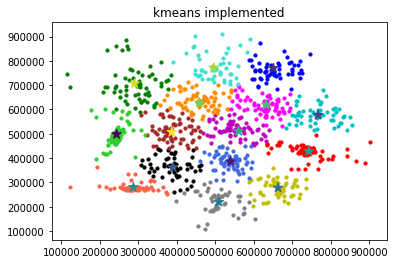

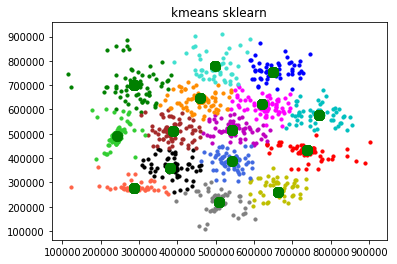

In [10]:
######## same as step 5 but kmeans #########

#plot 
plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][y_kmeans_voted == i], X_te[:, 1][y_kmeans_voted == i], s=10, c = colors[i-1])
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c=range(1,16), s=100)
plt.title('kmeans implemented')
plt.show()

# Plot
plt.figure()
for i in range(1,16):
    plt.scatter(X_te[y_kmeans_voted == i, 0], X_te[y_kmeans_voted == i, 1], s = 10, c = colors[i-1], label = 'Cluster')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')
plt.title('kmeans sklearn')
plt.show()

# X_te[y_kmeans == 1, 0] == X_te[:, 0][y_kmeans == 1]

In [11]:
######## same as step 6 but kmeans #########
# confusion matrix
cm_kmeans = confusion_matrix(y_test, y_kmeans_voted)
print(cm_kmeans)
np.sum(np.diag(cm_kmeans))/len(X_test)

[[49  0  0  3  0  0  0  0  0  0  0  5  0  0  2]
 [ 0 54  0  0  1  0  0  0  3  0  4  0  0  7  1]
 [ 0  0 66  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  4 47  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  1  1 42  0  2  0  7  0  4  8  7  0  0]
 [ 0  0  5  0  0 48  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 38  2  5 12  0  0  1  1  0]
 [ 0  0  0  0  0  5  6 42  0  0  0  0  4  0  0]
 [ 0  2  0  0  5  0  7  0 60  0  7  0  0  3  0]
 [ 0  0  0  0  0  0  1  1  0 65  0  0  0  0  0]
 [ 0  3  0  0  2  0  0  0  5  0 48  2  0  0  1]
 [ 3  0  0  6 10  0  0  0  0  0  4 54  0  0  1]
 [ 0  0  2  0  3  2  3  4  1  0  0  1 58  0  0]
 [ 0  3  0  0  0  0  0  0  0  1  0  0  0 76  0]
 [ 5  2  0  0  0  0  0  0  1  0  7  1  0  0 44]]


0.791

In [12]:
"""Step 8 (1pts): Compare the results between KNN and K-means"""
# KNN and KMeans are very similar.
# Both have the right clusters and the right centroids whereas KNN has higher accuracy in predicting centroids and clusters.

'Step 8 (1pts): Compare the results between KNN and K-means'